### Case Study 3 : Textual analysis of movie reviews

** Due Date: April 6, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:**

Helen Hong
Haley Huang
Tom Meagher
Tyler Reese

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data can be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.
* [Upgrade Scikit Learn on Mac OS X](http://stackoverflow.com/questions/12219657/upgrade-version-of-scikit-learn-included-in-enthought-canopy-distribution)

#### Global Imports

In [22]:
import numpy as np
import pandas as pa
import matplotlib.pylab as py
import matplotlib.pyplot as plt
import scipy
from time import time

%matplotlib inline

#### Load data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_files
from sklearn.cross_validation import train_test_split
from sklearn import metrics

dataset = load_files('text_analytics/txt_sentoken', shuffle=False)
print("n_samples: %d" % len(dataset.data))

#### Split data into training (75%) and testing (25%) sets

In [11]:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

#### Build pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Vectorizer / classifier pipeline that filters out tokens that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])

#### Grid search

In [13]:
# Find out whether unigrams or bigrams are more useful.
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
# Fit pipeline on training set using grid search for the parameters
grid_search.fit(docs_train, y_train)

# Print cross-validated scores for each parameter set explored by the grid search
print(grid_search.grid_scores_)

# Predict outcome on testing set and store it in a variable named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

[mean: 0.83267, std: 0.01703, params: {'vect__ngram_range': (1, 1)}, mean: 0.85267, std: 0.01367, params: {'vect__ngram_range': (1, 2)}]
             precision    recall  f1-score   support

        neg       0.86      0.89      0.88       248
        pos       0.89      0.86      0.88       252

avg / total       0.88      0.88      0.88       500



#### Print and plot confusion matrix

[[221  27]
 [ 35 217]]


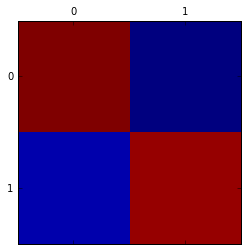

In [21]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
plt.matshow(cm)
plt.show()

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

#### Parameters in tf-idf Vectorizer
* **min_df**: filter all terms with frequency lower than this value
* **max-df**: filter all terms with frequecy greater than this value, used to filter out stop words.
* **n-gram range**: How many n-gram words are to be considered

In [16]:
tfidfv = TfidfVectorizer()
tfidfv = tfidfv.set_params(max_df=0.75, max_features= 5000, use_idf= True, smooth_idf=True, sublinear_tf = True)

#### Run tf-idf vectorizer object on training set

In [18]:
t0 = time()
vectors = tfidfv.fit_transform(docs_train) 
print("done in %0.3fs" % (time() - t0))

done in 1.694s


In [23]:
text_clf4 = MultinomialNB().fit(vectors, y_train)
text_clf4.score(vectors,y_train)

0.93066666666666664

In [24]:
count_test= tfidfv.transform(docs_test)
predicted4 = text_clf4.predict(count_test)
np.mean(predicted4 == y_test)

0.82399999999999995

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

#### K-Neareast Neighbour Using Grid Search

In [26]:
from sklearn.neighbors import KNeighborsClassifier

tfidf_knn = TfidfVectorizer()
tfidf_knn.set_params(analyzer="word", max_df=0.75, ngram_range=(1, 2), use_idf=True, min_df=0.01, binary=False)
knn = KNeighborsClassifier(weights="distance", metric="euclidean")
pip_knn = Pipeline([("tfidf", tfidf_knn), ("lalg", knn)])
parameters3 = [ {
                    "tfidf__norm":[None, "l2"],
                    "lalg__n_neighbors": range(3, 13),
                    } ]
GridSearch_knn = GridSearchCV(pip_knn, parameters3,
                               n_jobs=-1, verbose=1, cv=5)            
GridSearch_knn.fit(docs_train, y_train)

print GridSearch_knn.best_estimator_
print "Mean accuracy on validation set = %f" % GridSearch_knn.best_score_
print GridSearch_knn.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.4min finished


Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.75, max_features=None, min_df=0.01,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=T...ean',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='distance'))])
Mean accuracy on validation set = 0.702000
{'lalg__n_neighbors': 12, 'tfidf__norm': 'l2'}


In [27]:
predicted5 = GridSearch_knn.predict(docs_test)
np.mean(predicted5 == y_test) 

0.70199999999999996

             precision    recall  f1-score   support

          0       0.75      0.60      0.67       248
          1       0.67      0.80      0.73       252

avg / total       0.71      0.70      0.70       500

0.702
Precision matrix
[[150  51]
 [ 98 201]]


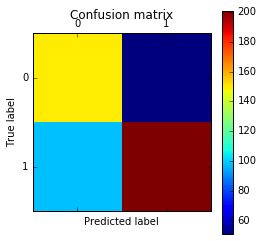

In [29]:
con5= metrics.confusion_matrix(predicted5, y_test)
print(metrics.classification_report(y_test, predicted5))
print np.mean(predicted5== y_test)
print 'Precision matrix'
print con5
plt.matshow(con5)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### PCA

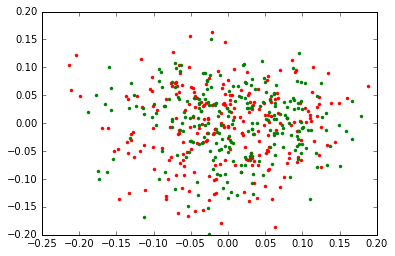

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pylab as py
X2D = PCA(n_components=2).fit_transform(vectors.toarray())
py.plot(X2D[y_test==0,0],X2D[y_test==0,1],'r.')
py.plot(X2D[y_test==1,0],X2D[y_test==1,1],'g.')
#py.plot(X2D[y==2,0],X2D[y==2,1],'b.')

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 3".